In [1]:
%matplotlib inline

# Import Dependencies

In [2]:
# Data analysis
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', palette='pastel')

# Preprocessing

In [3]:
df = pd.read_csv('dataset_2.csv')
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             119 non-null    object 
 1   Trips Completed  119 non-null    int64  
 2   Accept Rate      119 non-null    object 
 3   Supply Hours     119 non-null    int64  
 4   Rating           119 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


It seems that the data is already in good shape. Hence, we simply convert the percentages to decimals, and conclude the preprocessing phase.

In [5]:
df['Accept Rate'] = df['Accept Rate'].apply(lambda x: float(x[:-1]) / 100)

# Data Exploration
Next, let's see how the numerical data are distributed.

Text(0.5, 1.0, 'Average Rating')

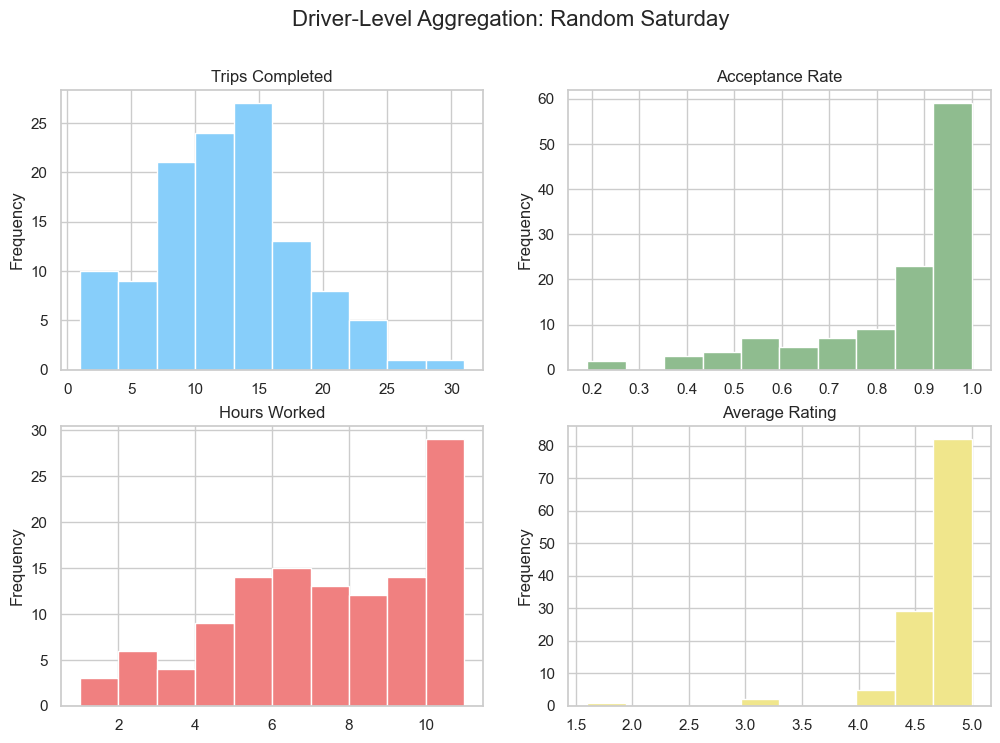

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Driver-Level Aggregation: Random Saturday', fontsize=16)

df['Trips Completed'].plot.hist(color='lightskyblue', ax=ax[0][0])
ax[0][0].set_title('Trips Completed')

df['Accept Rate'].plot.hist(color='darkseagreen', ax=ax[0][1])
ax[0][1].set_title('Acceptance Rate')

df['Supply Hours'].plot.hist(color='lightcoral', ax=ax[1][0])
ax[1][0].set_title('Hours Worked')

df['Rating'].plot.hist(color='khaki', ax=ax[1][1])
ax[1][1].set_title('Average Rating')

It appears that most drivers worked longer hours this Saturday, completing between 10-15 trips on average, with fairly high acceptance rates and ratings across the board.

# Scenario 1
It is going to be a huge Saturday and there will need to be many more cars on the road than last week. In order to get drivers to go online, we're assessing the following two bonus options in terms of cost:

- Option 1: $50 for each driver that is online at least 8 hours, accepts 90% of requests, completes 10 trips, and has a rating of 4.7 or better during the time frame;
- Option 2: $4/trip for all drivers who complete 12 trips, and have a 4.7 or better rating.

### Question 1
How much would the total bonus payout be with Option 1?

In [7]:
# Filter dataframe based on conditions
driver_pool_1 = df[(df['Supply Hours'] >= 8) & 
                   (df['Accept Rate'] >= 0.9) & 
                   (df['Trips Completed'] >= 10) & 
                   (df['Rating'] >= 4.7)]
# Count rows
num_drivers = driver_pool_1.shape[0]
# Calculate payout
print(f'Total payout: ${num_drivers * 50}')

Total payout: $1050


### Question 2
How much would the total bonus payout be with Option 2?

In [8]:
# Filter dataframe based on conditions
driver_pool_2 = df[(df['Trips Completed'] >= 12) & 
                   (df['Rating'] >= 4.7)]
# Sum values in trips column
num_trips = driver_pool_2['Trips Completed'].sum()
# Calculate payout
print(f'Total payout: ${num_trips * 4}')

Total payout: $2976


### Question 3
How many drivers would qualify for a bonus under Option 1 but not under Option 2?

In [9]:
# Perform left outer join
df_3 = pd.merge(driver_pool_1, driver_pool_2, on='Name', how='outer', indicator=True)
df_3 = df_3[df_3['_merge'] == 'left_only']
# Count rows
print(f'{df_3["Name"].count()} drivers')

2 drivers


### Question 4
What percentages of drivers online completed less than 10 trips, had an acceptance rate of less than 90%, and had a rating of 4.7 or higher?

In [10]:
# Filter dataframe based on conditions
driver_pool_4 = df[(df['Trips Completed'] < 10) & 
                   (df['Accept Rate'] < 0.9) & 
                   (df['Rating'] >= 4.7)]
# Count rows
num_drivers = driver_pool_4.shape[0]
# Calculate percentage
print(f'{num_drivers / len(df) * 100 :.2f}% of drivers')

10.92% of drivers


# Scenario 2
A taxi driver currently generates $200 per day in fares (before expenses), works six days a week, takes three weeks off, and has the following expenses:

- Gas - $200 per week
- Insurance - $400 per month
- Vehicle rent (by the week) - $500

The driver doesn't pay gas and rent expenses on off weeks.

Now, let's assume that the same driver would buy a Town Car and partner with Uber. If he does, his gas expenses would go up by 5%, his insurance expense would decrease by 20%, and he would no longer be renting a vehicle. However, he would need to buy a car. The driver would still take three weeks off per year.

### Question 5
How much money (after expenses) does the taxi driver make per year without partnering with Uber?

In [11]:
# Income: $200/day * 6 days/week * (52 - 3) weeks/year
income = 200 * 6 * (52 - 3)
# Expenses: [$200/week * (52 - 3) weeks/year] + [$400/month * 12 months/year] + [$500/week * (52 - 3) weeks/year]
expenses = (200 * (52 - 3)) + (400 * 12) + (500 * (52 - 3))
# Calculate yearly profit margin
margin = income - expenses
print(f'Yearly profit margin: ${margin}')

Yearly profit margin: $19700


# Question 6
You are convincing the same driver above to buy a Town Car and partner with Uber. Assuming the new car is $40000, how much would the driver's gross fares need to increase per week to fully pay for the car in year 1 and maintain the same yearly profit margin as before?

In [12]:
# New expenses: [$200/week * 105% * (52 - 3) weeks/year] + [$400/month * 80% * (52 - 3) weeks/year] + $40000
new_expenses = (200 * 1.05 * (52 - 3)) + (400 * 0.8 * 12) + 40000
# Old weekly fare: $200/day * 6 days/week
old_weekly_fare = 200 * 6
# New weekly fare: (Yearly profit margin + New expenses) / Number of weeks worked in year
new_weekly_fare = (margin + new_expenses) / (52 - 3)
# Calculate weekly fare increase
print(f'Weekly fare increase: ${new_weekly_fare - old_weekly_fare:.2f} ({(new_weekly_fare - old_weekly_fare) / old_weekly_fare * 100:.2f}%)')

Weekly fare increase: $306.73 (25.56%)
